In [1]:
# Import data science packages
import pandas as pd
import numpy as np

# Import visualization and geoanalytics packages
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import box
import pyproj

In [2]:
dg = pd.read_csv('Original_data/Parking_Citations_After_July_1_2015.csv', usecols = 
                 ['Issue Date', 'Issue time', 'Location', 'Violation Description', 'Latitude', 'Longitude'])

In [3]:
dg.columns = ['Issue_Date', 'Issue_Time', 'Location', 'Violation_Description', 'Latitude', 'Longitude']

In [4]:
dg.head()

Issue_Date  Issue_Time          Location Violation_Description  \
0  2019/09/17 12:00:00 AM       817.0    1324 84TH PL W  NO PARK/STREET CLEAN   
1  2019/09/17 12:00:00 AM       811.0    1000 85TH ST W            METER EXP.   
2  2019/09/17 12:00:00 AM       809.0    1000 85TH ST W  NO PARK/STREET CLEAN   
3  2019/09/17 12:00:00 AM       805.0  8021 VERMONT AVE  NO PARK/STREET CLEAN   
4  2019/09/17 12:00:00 AM       727.0    1473 45TH ST W     BLOCKING DRIVEWAY   

       Latitude     Longitude  
0  6.471017e+06  1.808559e+06  
1  6.473192e+06  1.808298e+06  
2  6.473192e+06  1.808298e+06  
3  6.473164e+06  1.810388e+06  
4  6.469917e+06  1.823537e+06

In [5]:
dg.isna().sum()

Issue_Date                  0
Issue_Time               2167
Location                  346
Violation_Description     890
Latitude                    2
Longitude                   2
dtype: int64

In [6]:
len(dg)

8706412

In [7]:
dg = dg.dropna()

In [8]:
dg.isna().sum()

Issue_Date               0
Issue_Time               0
Location                 0
Violation_Description    0
Latitude                 0
Longitude                0
dtype: int64

In [9]:
dg.describe()

Issue_Time      Latitude     Longitude
count  8.703063e+06  8.703063e+06  8.703063e+06
mean   1.191127e+03  5.627485e+06  1.620858e+06
std    4.753352e+02  2.139752e+06  5.893104e+05
min    0.000000e+00  9.999900e+04  9.999900e+04
25%    9.050000e+02  6.423773e+06  1.826165e+06
50%    1.147000e+03  6.453452e+06  1.842364e+06
75%    1.457000e+03  6.475623e+06  1.858229e+06
max    2.359000e+03  6.514332e+06  1.942669e+06

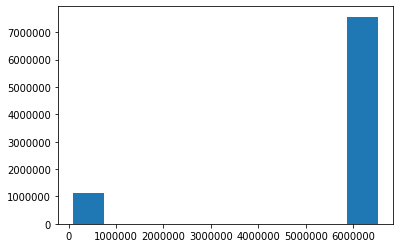

In [10]:
plt.hist(dg.Latitude)
plt.show()

In [11]:
dg[(dg['Latitude'] < 100000)|(dg['Longitude'] < 100000)]

Issue_Date  Issue_Time                 Location  \
5        2019/09/17 12:00:00 AM       611.0        1507 FLORENCE AVE   
51       2019/09/17 12:00:00 AM       739.0      593 WASHINGTON BLVD   
52       2019/09/17 12:00:00 AM       738.0      593 WASHINGTON BLVD   
68       2019/09/17 12:00:00 AM       537.0           945 FLOWER AVE   
75       2019/09/17 12:00:00 AM       224.0       13050 MINDANAO WAY   
...                         ...         ...                      ...   
8706085  2015/07/02 12:00:00 AM       924.0       1500 BLK SHELL AVE   
8706122  2015/07/02 12:00:00 AM      1425.0          239 MAPLE AVE S   
8706142  2015/07/02 12:00:00 AM      1609.0  12150 VICTORY BOULEVARD   
8706341  2015/07/02 12:00:00 AM      1215.0           2233 21ST ST W   
8706344  2015/07/02 12:00:00 AM      1208.0           2347 21ST ST W   

        Violation_Description  Latitude  Longitude  
5          PARKED ON SIDEWALK   99999.0    99999.0  
51       NO PARK/STREET CLEAN   99999.0    99999.0  
52       NO PARK/STREET CLEAN   99999.0    99999.0  
68       OVNIGHT PRK W/OUT PE   99999.0    99999.0  
75                 NO PARKING   99999.0    99999.0  
...                       ...       ...        ...  
8706085  NO PARK/STREET CLEAN   99999.0    99999.0  
8706122           YELLOW ZONE   99999.0    99999.0  
8706142  NO STOPPING/ANTI-GRI   99999.0    99999.0  
8706341  NO PARK/STREET CLEAN   99999.0    99999.0  
8706344  NO PARK/STREET CLEAN   99999.0    99999.0  

[1134087 rows x 6 columns]

In [12]:
dg = dg[(dg['Latitude'] > 100000)|(dg['Longitude'] > 100000)]

In [13]:
dg = dg[dg['Violation_Description']  == 'NO PARK/STREET CLEAN']

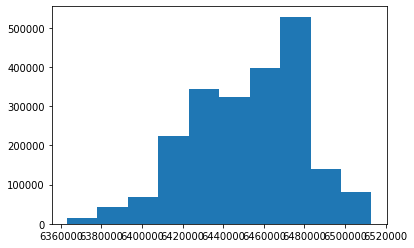

In [14]:
plt.hist(dg.Latitude)
plt.show()

In [15]:
def time_padding(time):
    time = str(int(time))
    return '0'*(4-len(time)) + time
# Apply padding to Issue_time
dg['Issue_Time'] = dg['Issue_Time'].apply(time_padding)
# Creating combined Datetime column
dg['Issue_Date'] = dg['Issue_Date'].apply(lambda x: x[:10])
dg['Datetime'] = pd.to_datetime(dg['Issue_Date'] + ' ' + dg['Issue_Time'], format='%Y/%m/%d %H%M')
# Filter for street cleaning violations

In [16]:
dg['Hour'] = dg['Datetime'].apply(lambda x: x.hour)

In [17]:
dg.head()

Issue_Date Issue_Time          Location Violation_Description  \
0   2019/09/17       0817    1324 84TH PL W  NO PARK/STREET CLEAN   
2   2019/09/17       0809    1000 85TH ST W  NO PARK/STREET CLEAN   
3   2019/09/17       0805  8021 VERMONT AVE  NO PARK/STREET CLEAN   
16  2019/09/17       1228  1300 RIVIERA AVE  NO PARK/STREET CLEAN   
17  2019/09/17       1226  1203 RIVIERA AVE  NO PARK/STREET CLEAN   

        Latitude     Longitude            Datetime  Hour  
0   6.471017e+06  1.808559e+06 2019-09-17 08:17:00     8  
2   6.473192e+06  1.808298e+06 2019-09-17 08:09:00     8  
3   6.473164e+06  1.810388e+06 2019-09-17 08:05:00     8  
16  6.419071e+06  1.819233e+06 2019-09-17 12:28:00    12  
17  6.418885e+06  1.819472e+06 2019-09-17 12:26:00    12

In [22]:
# Conversion using pyproj module
inProj = pyproj.Proj({'init': 'epsg:2229'}, preserve_units=True) # make sure unit preserve 
outProj = pyproj.Proj({'init': 'epsg:4326'})
y_1,x_1 = pyproj.transform(inProj,outProj,dg["Latitude"].values, dg["Longitude"].values)

In [24]:
# Add on the converted coordinates
dg["Latitude"] = x_1
dg["Longitude"] = y_1
dg.head()

Issue_Date Issue_Time          Location Violation_Description   Latitude  \
0   2019/09/17       0817    1324 84TH PL W  NO PARK/STREET CLEAN  33.961646   
2   2019/09/17       0809    1000 85TH ST W  NO PARK/STREET CLEAN  33.960946   
3   2019/09/17       0805  8021 VERMONT AVE  NO PARK/STREET CLEAN  33.966689   
16  2019/09/17       1228  1300 RIVIERA AVE  NO PARK/STREET CLEAN  33.990430   
17  2019/09/17       1226  1203 RIVIERA AVE  NO PARK/STREET CLEAN  33.991083   

     Longitude            Datetime  Hour  
0  -118.298938 2019-09-17 08:17:00     8  
2  -118.291763 2019-09-17 08:09:00     8  
3  -118.291875 2019-09-17 08:05:00     8  
16 -118.470404 2019-09-17 12:28:00    12  
17 -118.471020 2019-09-17 12:26:00    12

In [18]:
# Read file into dataframe
df = pd.read_csv('Coordinates Converted_Simplified Citation After 2015 July to 2019.csv')
# Turn Lat,Lon into tuple
df['Coordinates'] = (list(zip(df.Latitude, df.Longitude)))
# Remove index
del df['Unnamed: 0']
# Rename columns
df.columns =  ['Issue_Date', 'Issue_time', 'Location', 'Violation_Description', 'Day_of_Week',
       'Latitude', 'Longitude', 'Coordinates']
# Time padding function
def time_padding(time):
    time = str(int(time))
    return '0'*(4-len(time)) + time
# Apply padding to Issue_time
df['Issue_time'] = df['Issue_time'].apply(time_padding)
# Creating combined Datetime column
df['Datetime'] = pd.to_datetime(df['Issue_Date'] + ' ' + df['Issue_time'], format='%Y-%m-%d %H%M')
# Filter for street cleaning violations
df = df[df['Violation_Description'] == 'NO PARK/STREET CLEAN']

In [19]:
# Turn citation coordinates into Geopandas geometry column
geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

In [20]:
geo_df.columns

Index(['Issue_Date', 'Issue_time', 'Location', 'Violation_Description',
       'Day_of_Week', 'Latitude', 'Longitude', 'Coordinates', 'Datetime',
       'geometry'],
      dtype='object')

In [21]:
# Created citation hour columns to compare visualization
geo_df['Hour'] = geo_df.Datetime.apply(lambda x: x.hour)

In [22]:
# Import steet centerline geometry with Geopandas
st_df = gpd.read_file('Streets_Centerline/Streets_Centerline.shp')

In [23]:
# Function to plot points
def plot_points(latitude, longitude, zoom=0.06, column='Day_of_Week', fsize=20, markersize=10):
    area_of_interest = (latitude, longitude)
    diameter_oi = zoom
    bbox = box(area_of_interest[1]-diameter_oi, area_of_interest[0]-diameter_oi,area_of_interest[1]
            +diameter_oi, area_of_interest[0]+diameter_oi)
    f, ax = plt.subplots(1, figsize=(fsize,fsize))
    ax.set_aspect('equal')
    st_df[st_df.geometry.within(bbox)].plot(ax=ax, color='grey', zorder=1)
    geo_df[geo_df.geometry.within(bbox)].plot(ax=ax, column = column, legend=True, zorder=2, markersize=markersize)
    return plt.show()

In [24]:
# Function to plot streets
def plot_streets(latitude, longitude, zoom=0.06, column='Day_of_Week', fsize=20, buffer=0.001, linewidth=2):
    area_of_interest = (latitude, longitude)
    diameter_oi = zoom
    bbox = box(area_of_interest[1]-diameter_oi, area_of_interest[0]-diameter_oi,area_of_interest[1]
            +diameter_oi, area_of_interest[0]+diameter_oi)
    fil_st_df = st_df[st_df.geometry.within(bbox)]
    fil_cit = geo_df[geo_df.geometry.within(bbox)].copy()
    fil_cit['geometry'] = fil_cit['geometry'].buffer(buffer)
    sjoined = gpd.sjoin(fil_st_df, fil_cit, how='inner', op='intersects')
    # st_df = gpd.read_file('Streets_Centerline/Streets_Centerline.shp', bbox=bbox )
    f, ax = plt.subplots(1, figsize=(fsize,fsize))
    ax.set_aspect('equal')
    fil_st_df.plot(ax=ax, color='grey', zorder=1)
    sjoined.plot(ax=ax, column = column, legend=True, zorder=2, linewidth=linewidth)
    return plt.show()

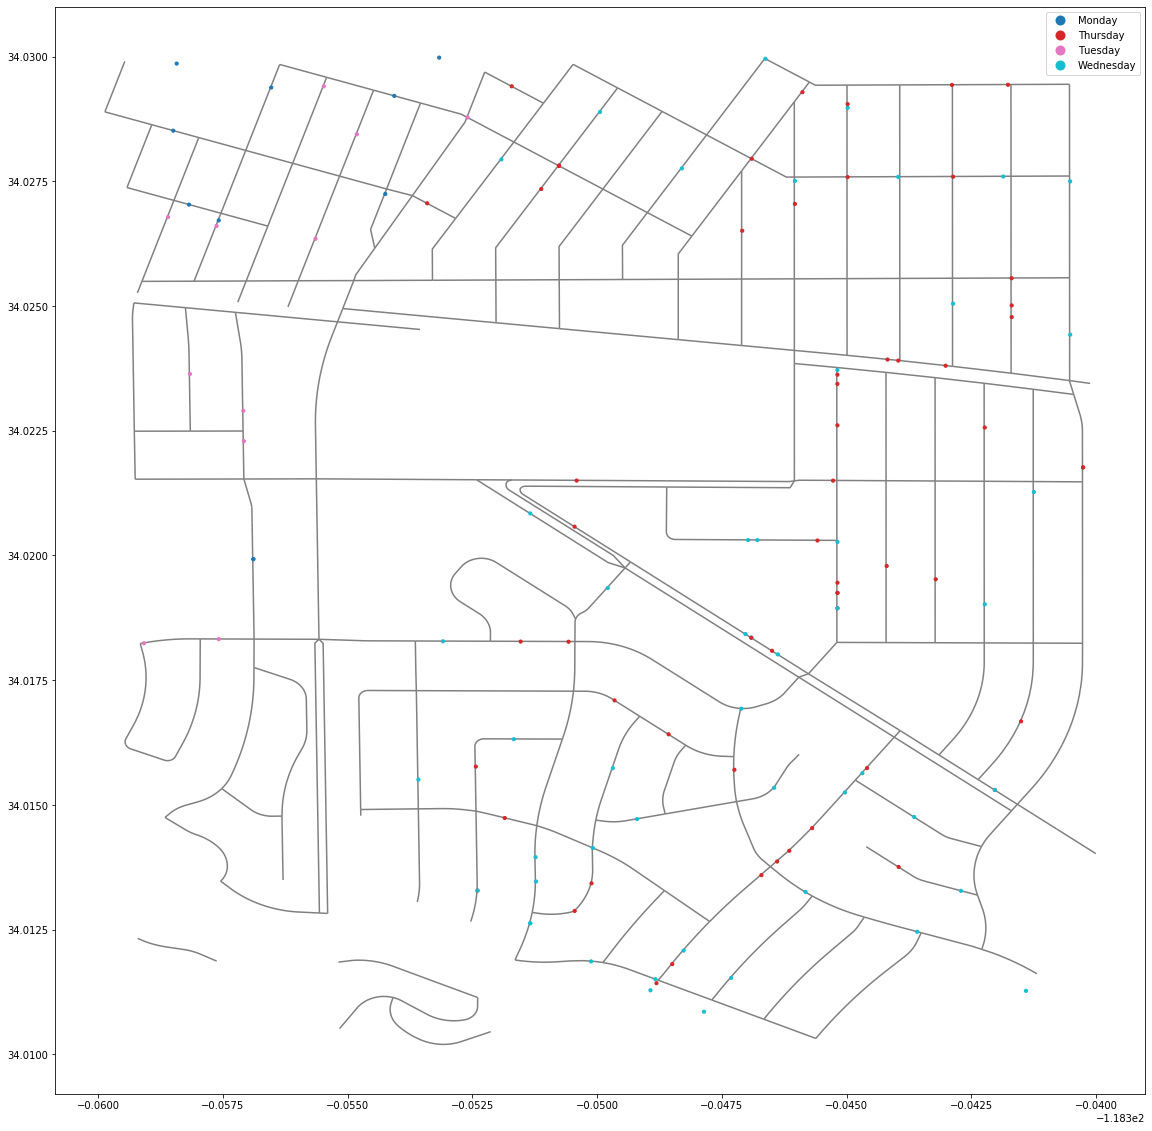

In [33]:
plot_points(34.02, -118.350, zoom=0.01)

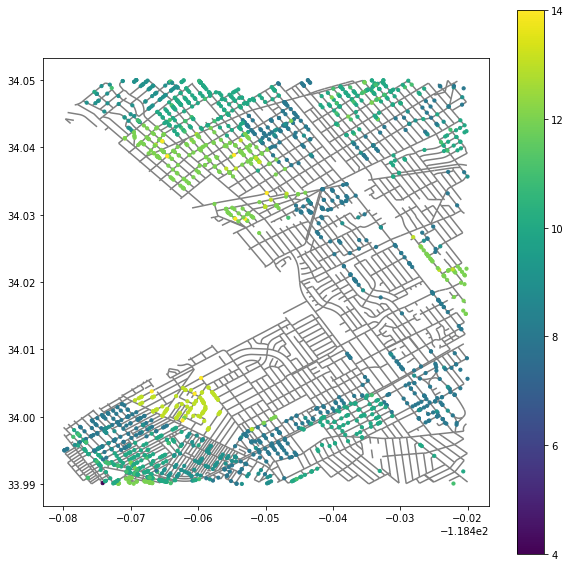

In [63]:
plot_points(34.02, -118.450, column='Hour', zoom=0.03, fsize=10)

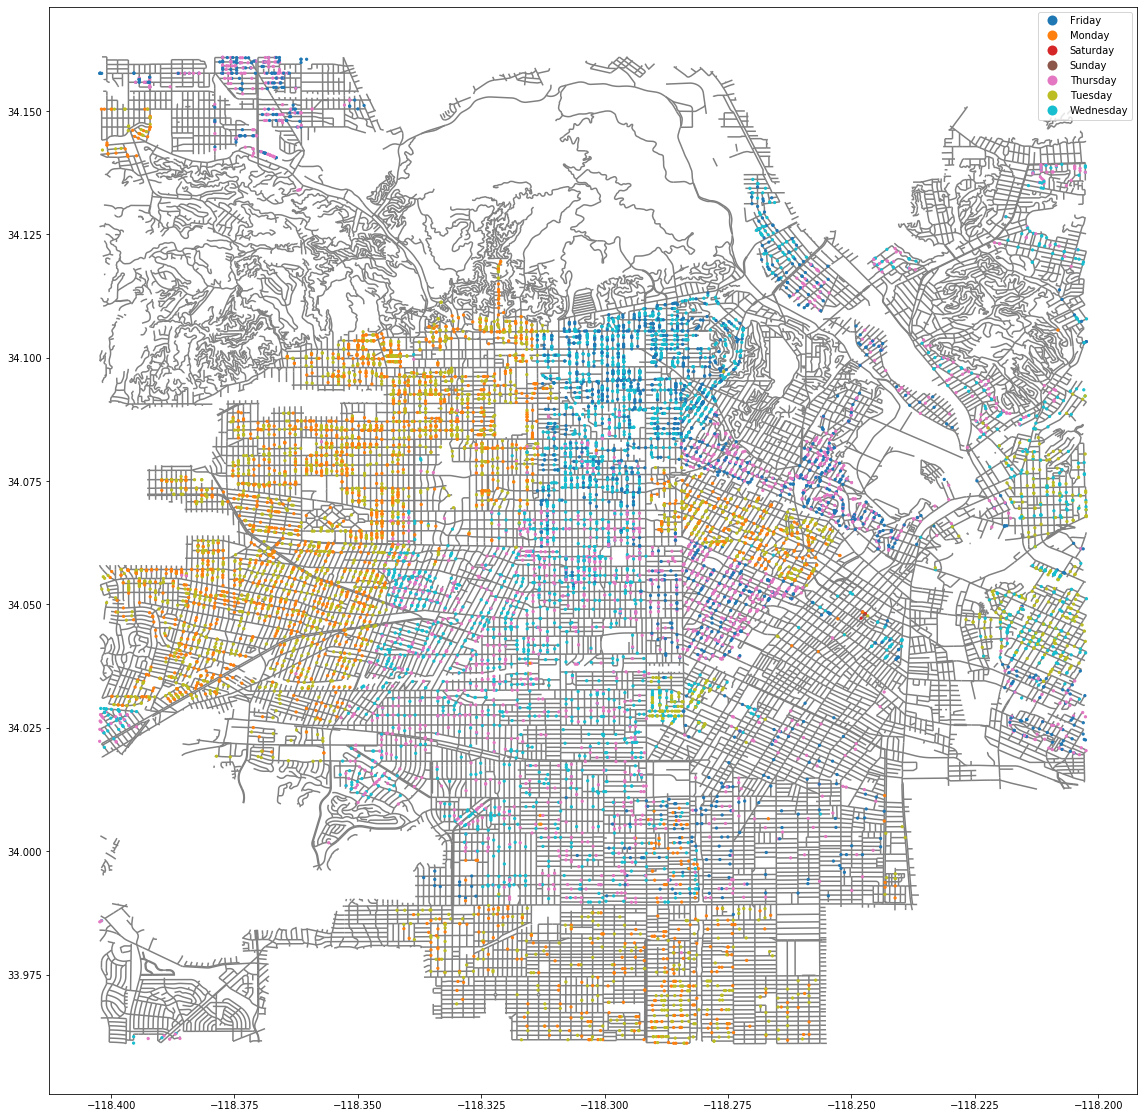

In [13]:
plot_points(34.060988, -118.302358, zoom=0.1, markersize=5)

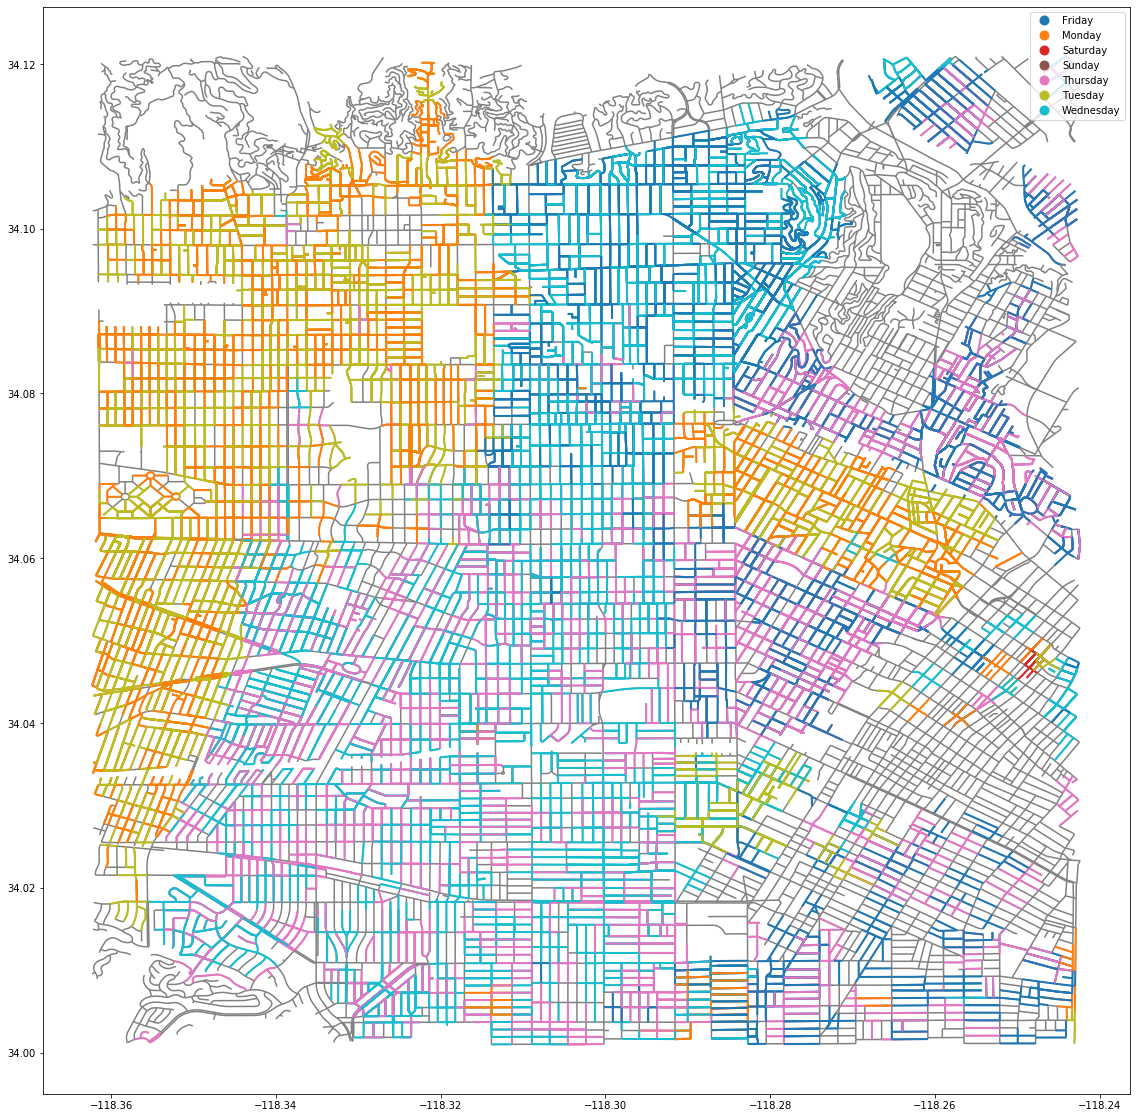

In [34]:
plot_streets(34.060988, -118.302358)

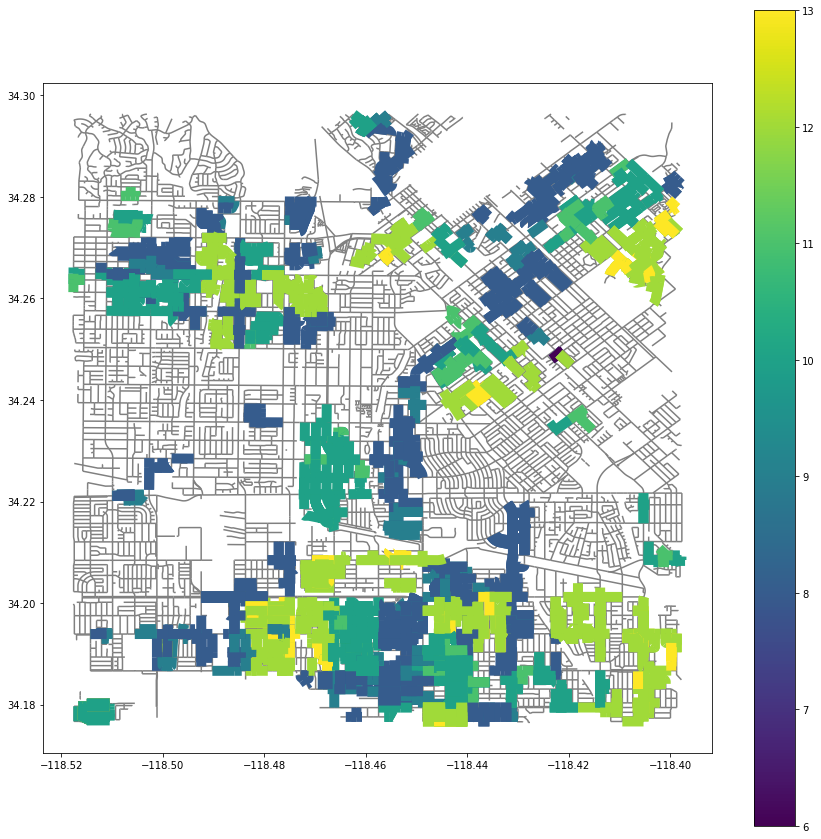

In [25]:
plot_streets(34.2364, -118.4577, fsize=15, column='Hour', linewidth=10)

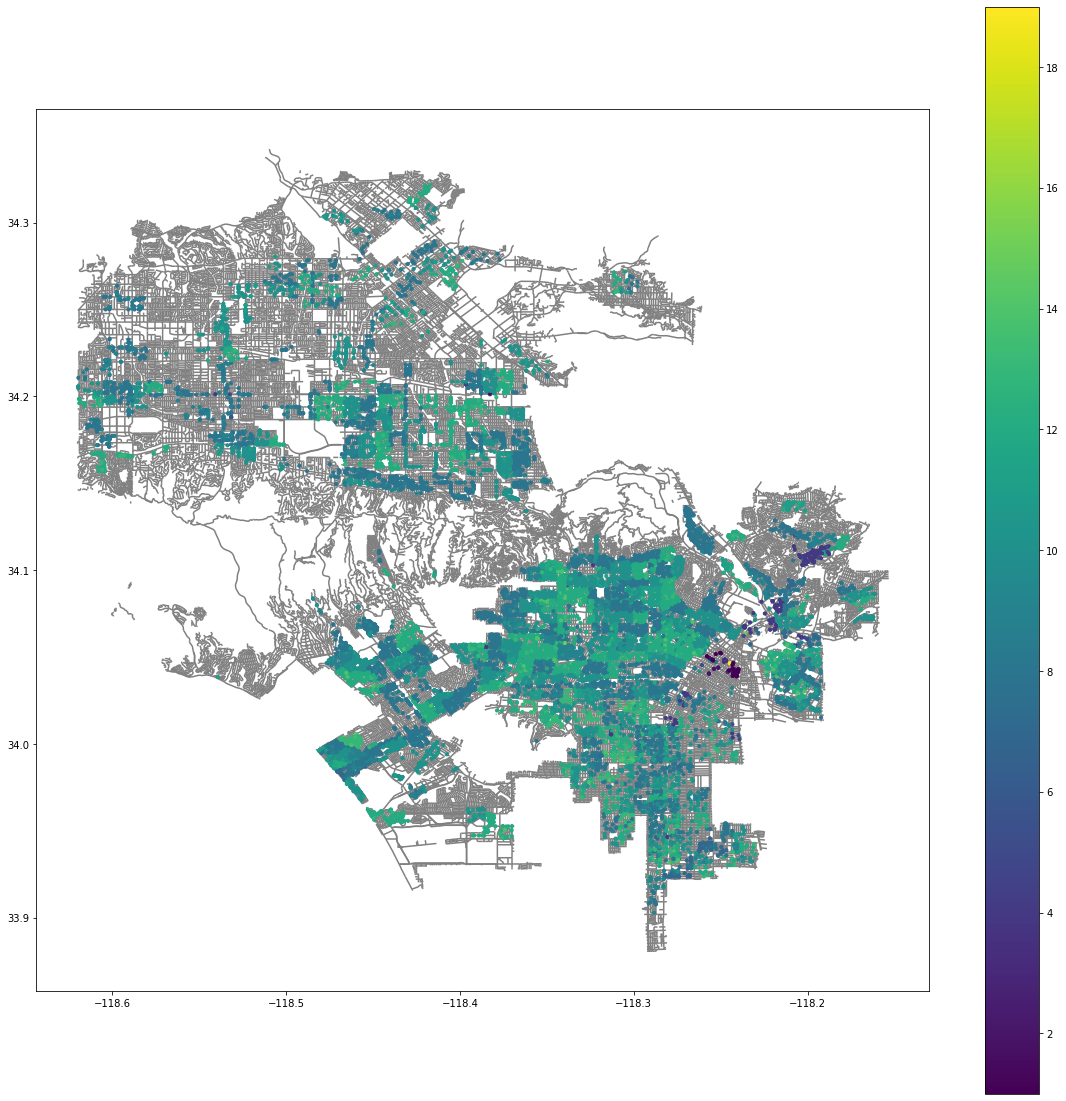

In [64]:
plot_points(34.18, -118.32, zoom=0.3, column='Hour', markersize=10)

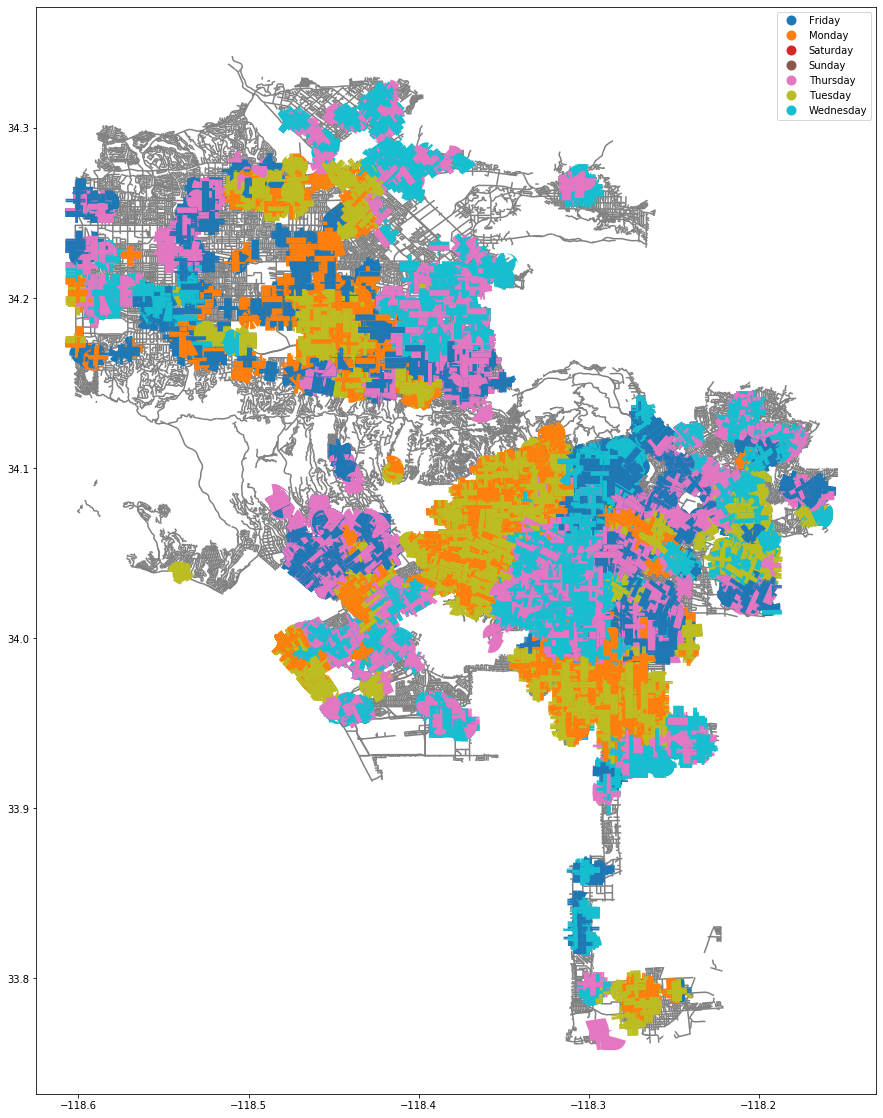

In [33]:
plot_streets(34.060988, -118.302358, zoom=0.3, linewidth=20)